<a href="https://colab.research.google.com/github/rameshboggu36/customer_segregation/blob/master/Customer_Segregation_with_silhouette_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mall = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [ ]:
mall.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [ ]:
mall.tail(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
199,200,Male,30,137,83


The dataset contains
1. CustomerId - unique identification number for each customer.
2. Gender - Gender of the Customer
3. Age : Age of the customer
4. Annual Income (k$) : Annual Income of the Customer
5. Spending Score (1-1000) : Score assigned by the mall based on Customer behavior and spending nature

# ___Information about the Dataset___




In [ ]:
mall.shape

(200, 5)

# $info()$
info() is a method used for quickly getting an overview of the DataFrame, including information about

1. The data types,
2. non-null values,
3. memory usage, and
4. The number of columns and rows.

It does not provide statistical information about the data itself, such as mean, min, max, quartiles, etc.

In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall.isnull().sum().sort_values(ascending=False)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
mall.duplicated().sum()

0

In [ ]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# ___$describe()$___
describe() is a method only works on columns with numerical data types useful for gaining insights of various summary statistics such as
1. count,
2. mean,
3. standard deviation,
4. minimum, and maximum values,
5. quartiles.


In [ ]:
pd.set_option("display.float_format",lambda x: '%.3f'%x)
mall[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000
mean,38.850,60.560,50.200
std,13.969,26.265,25.824
min,18.000,15.000,1.000
25%,28.750,41.500,34.750
50%,36.000,61.500,50.000
75%,49.000,78.000,73.000
max,70.000,137.000,99.000


# ___Exploratory Data Analysis (EDA)___

Let's check out some of the stats with some $Data$ $Visualization$ using built-in methods in pandas, seaborn and matplotlib!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's check the data with respect to gender, and see how other columns are related to it.

In [ ]:
mall['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

We can plot the above categorical data (Gender) as:
1. number of male and female customers by $count$ $plot$ from seaborn.
2. showing the percentage of male and female by $pie$ $chart$ from matplotlib

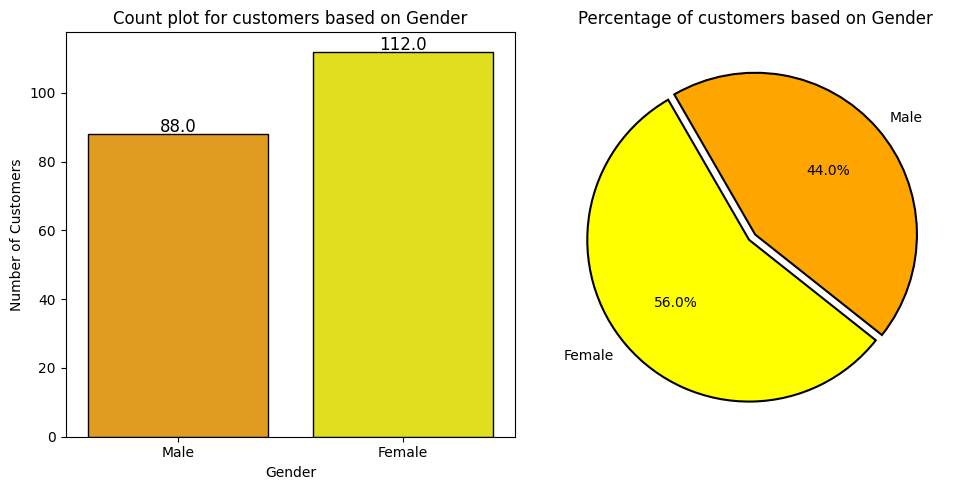

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=mall,x='Gender',ax=axes[0],palette=['orange','yellow'],edgecolor='black')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Count plot for customers based on Gender')
gender_counts = mall['Gender'].value_counts()
axes[1].pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle = 120,explode = (0.05,0),colors=['yellow','orange'],
       wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
axes[1].set_title('Percentage of customers based on Gender')
plt.tight_layout()
plt.show()

For representing the remaining numerical features with a distinction in customer gender we use ___$box plots$___ and ___$histograms$___.

In [ ]:
mall.groupby('Gender').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.000,38.098,12.644,18.000,29.000,35.000,47.500,68.000
Male,88.000,39.807,15.515,18.000,27.750,37.000,50.500,70.000


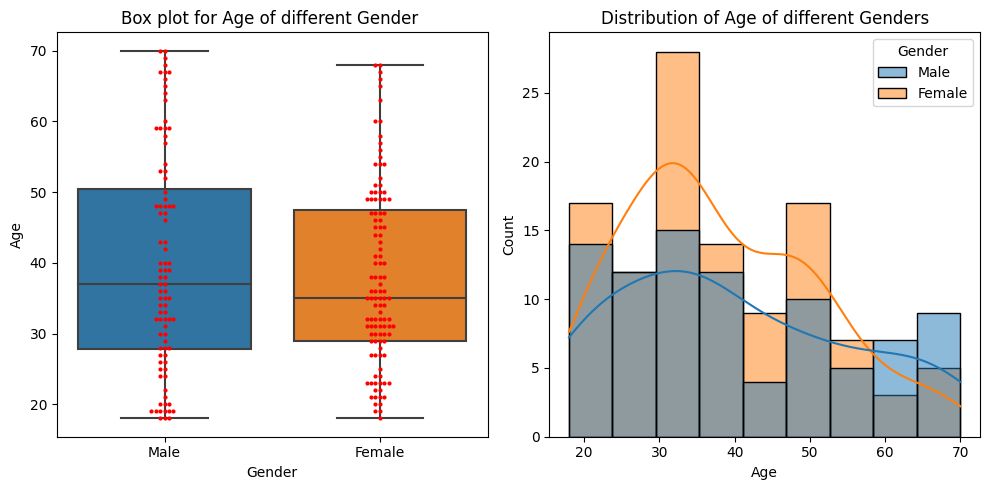

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=mall['Gender'],y=mall['Age'],ax=axes[0])
sns.swarmplot(x=mall['Gender'],y=mall['Age'], color="red", ax=axes[0],size=3)
axes[0].set_title('Box plot for Age of different Gender ')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')
sns.histplot(data=mall,x=mall['Age'],kde=True,hue='Gender',ax=axes[1])
axes[1].set_title('Distribution of Age of different Genders')
plt.tight_layout()
plt.show()


1. Age range of female customers is from just below $30$ to below $50$ whereas male customers Age ranges from below $30$ to just above $50$.
2. Median Age of male is slightly more than those of female.

In [ ]:
mall.groupby('Gender').describe()['Annual Income (k$)']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.000,59.250,26.012,16.000,39.750,60.000,77.250,126.000
Male,88.000,62.227,26.638,15.000,45.500,62.500,78.000,137.000


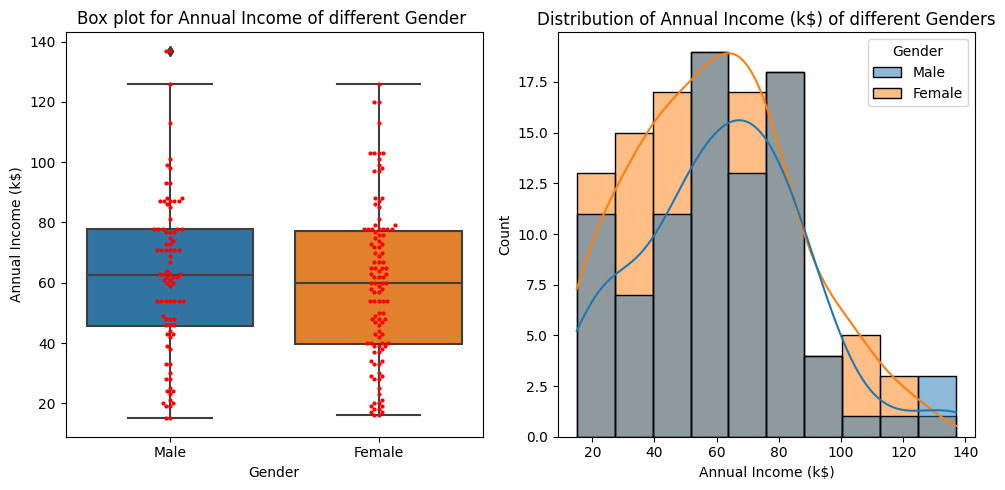

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=mall['Gender'],y=mall['Annual Income (k$)'],ax=axes[0])
sns.swarmplot(x=mall['Gender'],y=mall['Annual Income (k$)'], color="red", ax=axes[0],size=3)
axes[0].set_title('Box plot for Annual Income of different Gender ')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Annual Income (k$)')
sns.histplot(data=mall,x=mall['Annual Income (k$)'],kde=True,hue='Gender',ax=axes[1])
axes[1].set_title('Distribution of Annual Income (k$) of different Genders')
plt.tight_layout()
plt.show()


1. For Annual Income, female customer's income starts from $40k$ whereas male customer's is above this value.
2. Median Annual Income for female customer's is near about $60k$ and for male customer's is just above it.

In [ ]:
mall.groupby('Gender').describe()['Spending Score (1-100)']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.000,51.527,24.115,5.000,35.000,50.000,73.000,99.000
Male,88.000,48.511,27.897,1.000,24.500,50.000,70.000,97.000


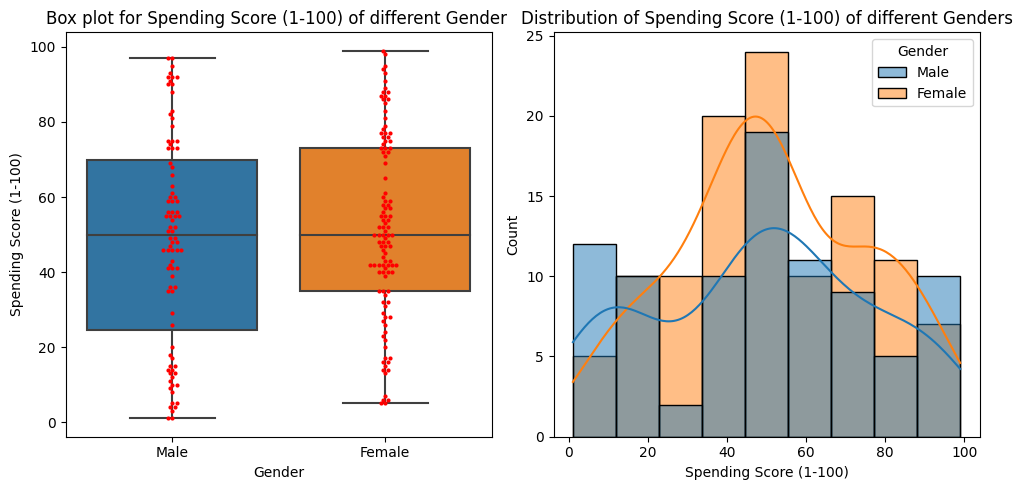

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=mall['Gender'],y=mall['Spending Score (1-100)'],ax=axes[0])
sns.swarmplot(x=mall['Gender'],y=mall['Spending Score (1-100)'], color="red", ax=axes[0],size=3)
axes[0].set_title('Box plot for Spending Score (1-100) of different Gender ')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Spending Score (1-100)')
sns.histplot(data=mall,x=mall['Spending Score (1-100)'],kde=True,hue='Gender',ax=axes[1])
axes[1].set_title('Distribution of Spending Score (1-100) of different Genders')
plt.tight_layout()
plt.show()


1. Distribution of Age and Annual Income (k$) is positively or righly skewed.
2. Spending Score data distribution is kind of negatively or left skewed and also similar to the Head and Shoulder pattern observed in stock charts.
3. It displays Score rising to a peak and then declines back to the base of the prior up-move.
4. Something similar can be observed with the 2 shoulders forming around the values 20 & 80 with head being centered in between 40 - 60.

In [ ]:
from scipy.stats import probplot

In [ ]:
import statsmodels.api as sm

In [ ]:
import scipy.stats as stats
from scipy.stats import skew


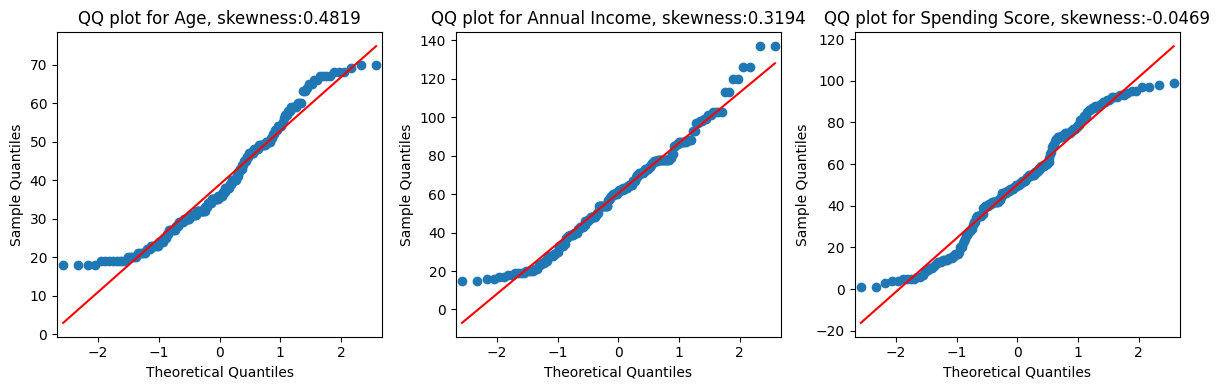

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
sm.qqplot(mall['Age'], line='s',ax=axes[0])
sm.qqplot(mall['Annual Income (k$)'], line='s',ax=axes[1])
sm.qqplot(mall['Spending Score (1-100)'], line='s',ax=axes[2])
axes[0].set_title('QQ plot for Age, skewness:{}'.format(skew(mall['Age']).round(4)))
axes[1].set_title('QQ plot for Annual Income, skewness:{}'.format(skew(mall['Annual Income (k$)']).round(4)))
axes[2].set_title('QQ plot for Spending Score, skewness:{}'.format(skew(mall['Spending Score (1-100)']).round(4)))
plt.tight_layout()
plt.show()

# __Modelling :__

We can see that this problem is an $Unsupervised$ Machine Learning Problem.

Unsupervised Learning : It is a problem where the target variable / feature is unknown.

We use K-Means Clustering algorithm which does not support categorical features
It is the most preferred algorithm for dealing with Unsupervised Learning that does the job of finding clusters / groups in data but with a mathematical approach.

$Approach:$

1. Selects k (assume k = 2) centroids randomly.
2. Distance between the centroids and all the data points are calculated.
3. If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
4. For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
5. This process repeats itself untill both centroids converge to fixed points.

Here the main parameter ($hyperparameter$) is $k$ (number of clusters).

$k$ - $Hyperparameter:$

It defines the number of clusters or groups the data is to be divided into.

For the selection of values of k, we use $elbow$ method or $silhouette$ method:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
model_data_sc = mall.drop(['CustomerID','Gender'],axis=1)

In [ ]:
model_data_sc.head(1)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39


In [ ]:
model_data_sc.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000
mean,38.850,60.560,50.200
std,13.969,26.265,25.824
min,18.000,15.000,1.000
25%,28.750,41.500,34.750
50%,36.000,61.500,50.000
75%,49.000,78.000,73.000
max,70.000,137.000,99.000


$Elbow$ $Method:$
1. It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k the value that resembles an elbow is selected.
2. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.

$Silhouette$ $Score$ $Method:$

1. It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other.
2. This score is calculated using the euclidean distance formula and the k value with highest score is selected for modeling.

In [ ]:
def cal_wcss_sil(data,range_n_clusters):
  wcss = []
  sil = []
  for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(data)
    label = kmeans.labels_
    wcss.append(kmeans.inertia_)
    if i>1:
      sil.append(silhouette_score(data, label, metric = 'euclidean'))
  return wcss,sil

To make the customers into clusters and to easily visualize, considered three different combination of features to train the model.

  1. income and age
  2. income and spending score
  3. spending score and age

After analyzing these, will proceed with PCA to cluster the customers.

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
income_score = model_data_sc[['Annual Income (k$)', 'Spending Score (1-100)']].values
income_age = model_data_sc[['Annual Income (k$)','Age']].values
age_score = model_data_sc[['Spending Score (1-100)','Age']].values

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
w_income_score,s_income_score = cal_wcss_sil(income_score,range_n_clusters)
w_income_age,s_income_age = cal_wcss_sil(income_age,range_n_clusters)
w_age_score,s_age_score = cal_wcss_sil(age_score,range_n_clusters)

In [ ]:
# range_n_clusters = [2, 3, 4, 5, 6]
def plot_sil(X,range_n_clusters):
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(10, 6)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

In [ ]:
def plot_wcss_sil(range_n_clusters,wcss,sil,combination):
  fig,axes = plt.subplots(1,2,figsize=(10,4))
  axes[0].plot(range_n_clusters, wcss)
  axes[0].set_title('The Elbow Point Graph for {}'.format(combination))
  axes[0].set_xlabel('No of Clusters')
  axes[0].set_ylabel('WCSS')
  axes[0].set_xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))
  axes[1].plot(range_n_clusters,sil)
  axes[1].set_title('The Silhouette Score Graph for {}'.format(combination))
  axes[1].set_xlabel('No of Clusters')
  axes[1].set_ylabel('Silhouette Score')
  axes[1].set_xticks(np.arange(min(range_n_clusters), max(range_n_clusters) + 1, 1))
  plt.tight_layout()
  plt.show()

In [ ]:
def print_values(data,range_n_clusters,wcss,sil,combination):
  print('WCSS and Silhouette Score for \n\t{}'.format(combination))
  print('-'*30)
  print('-'*30)
  print("{:<5}|\t{:<12}|\t{:<12}".format("K","WCSS","Sil"))
  print('-'*30)
  for i in range(len(range_n_clusters)):
    print("{:<5}|\t{:<12.3f}|\t{:<12.3f}".format(range_n_clusters[i],wcss[i],sil[i]))
    print('-'*30)
  plot_wcss_sil(range_n_clusters,wcss,sil,combination)
  plot_sil(data,range_n_clusters)


WCSS and Silhouette Score for 
	Income - Score
------------------------------
------------------------------
K    |	WCSS        |	Sil         
------------------------------
2    |	181363.596  |	0.297       
------------------------------
3    |	106348.373  |	0.468       
------------------------------
4    |	73679.789   |	0.493       
------------------------------
5    |	44448.455   |	0.554       
------------------------------
6    |	37233.815   |	0.540       
------------------------------


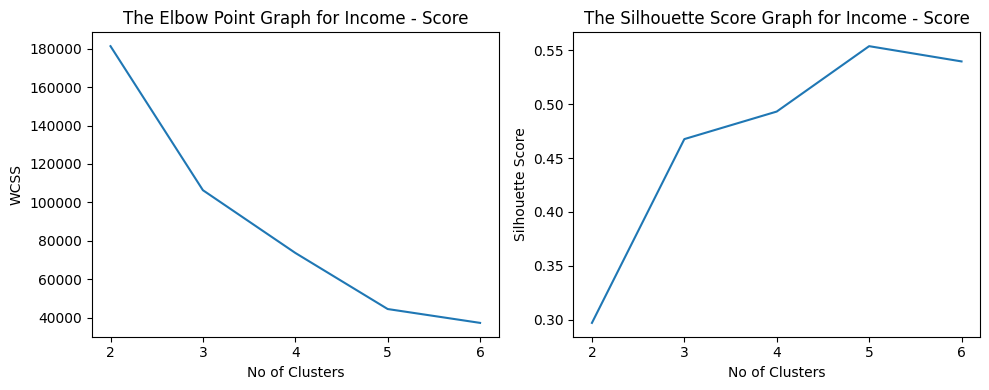

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5367558067779578


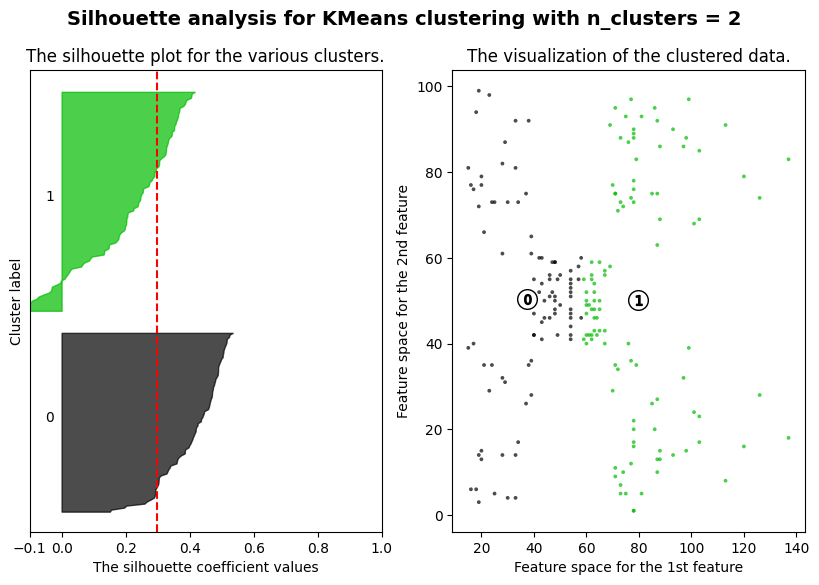

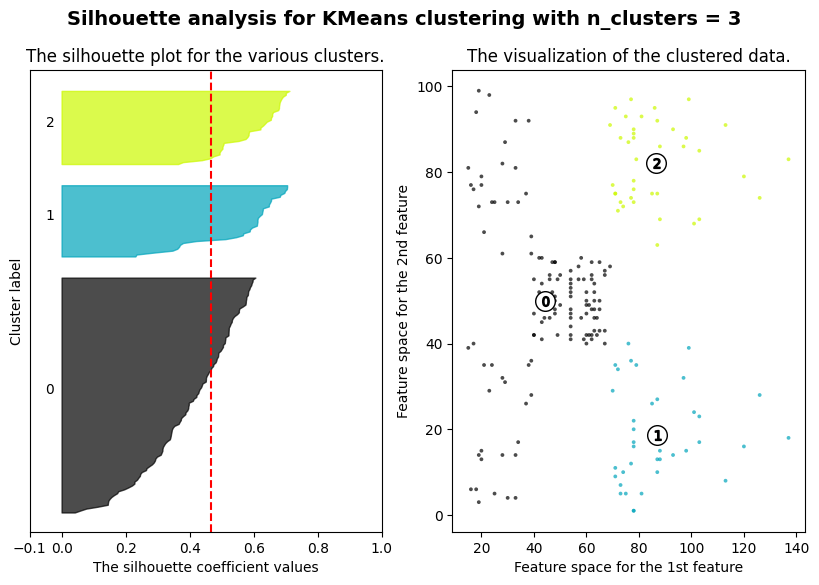

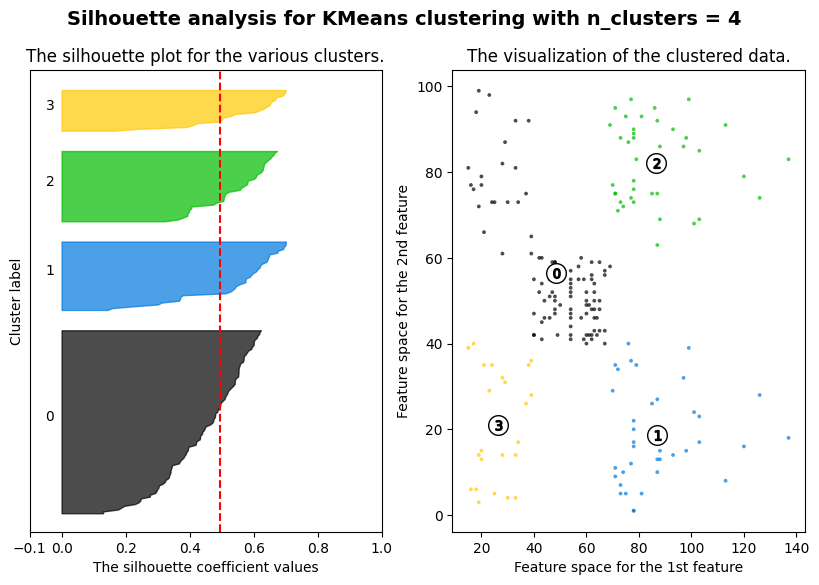

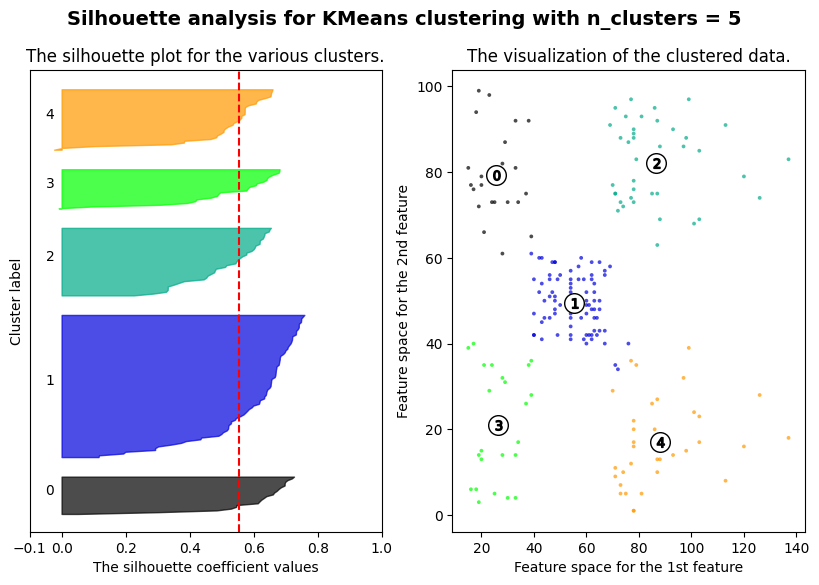

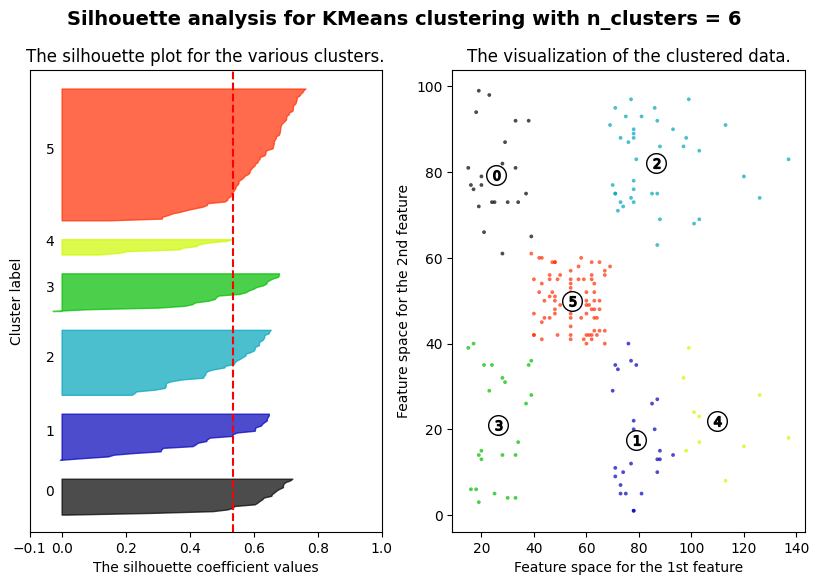

In [ ]:
print_values(income_score,range_n_clusters,w_income_score,s_income_score,'Income - Score')

WCSS and Silhouette Score for 
	Income - Age
------------------------------
------------------------------
K    |	WCSS        |	Sil         
------------------------------
2    |	87121.566   |	0.426       
------------------------------
3    |	59486.961   |	0.425       
------------------------------
4    |	39529.888   |	0.433       
------------------------------
5    |	31674.906   |	0.402       
------------------------------
6    |	25643.265   |	0.393       
------------------------------


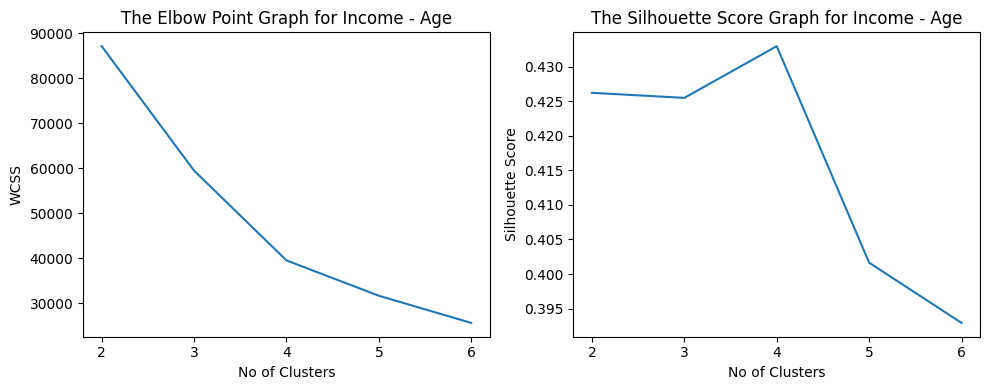

For n_clusters = 2 The average silhouette_score is : 0.42732135746475125
For n_clusters = 3 The average silhouette_score is : 0.3604636688839076
For n_clusters = 4 The average silhouette_score is : 0.41441024999649884
For n_clusters = 5 The average silhouette_score is : 0.4024797854680392
For n_clusters = 6 The average silhouette_score is : 0.3962104118856793


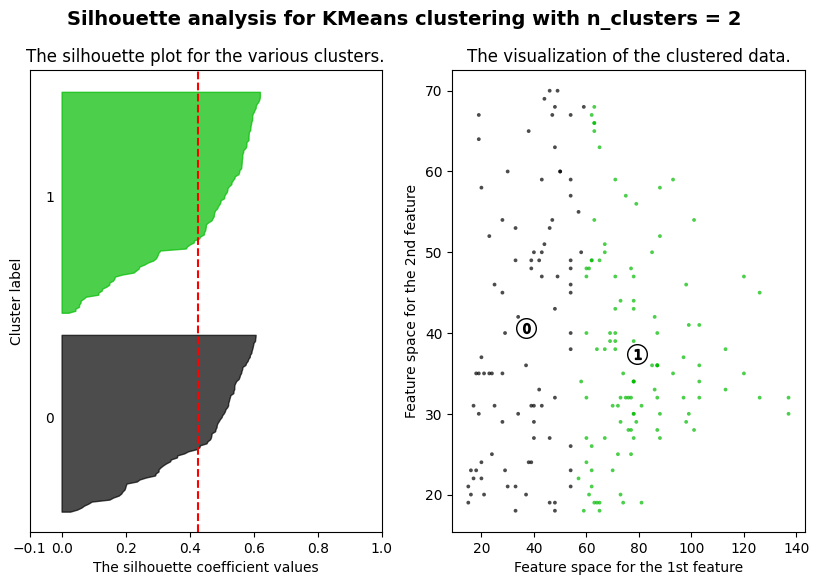

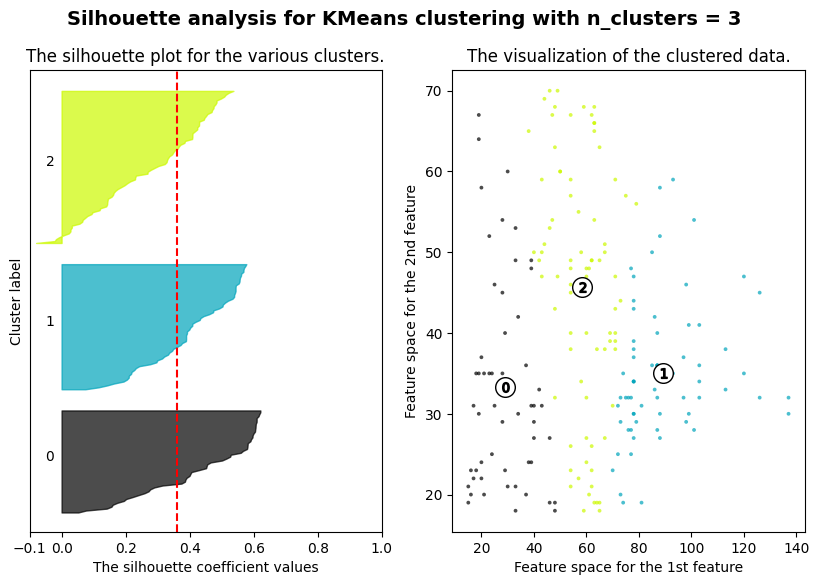

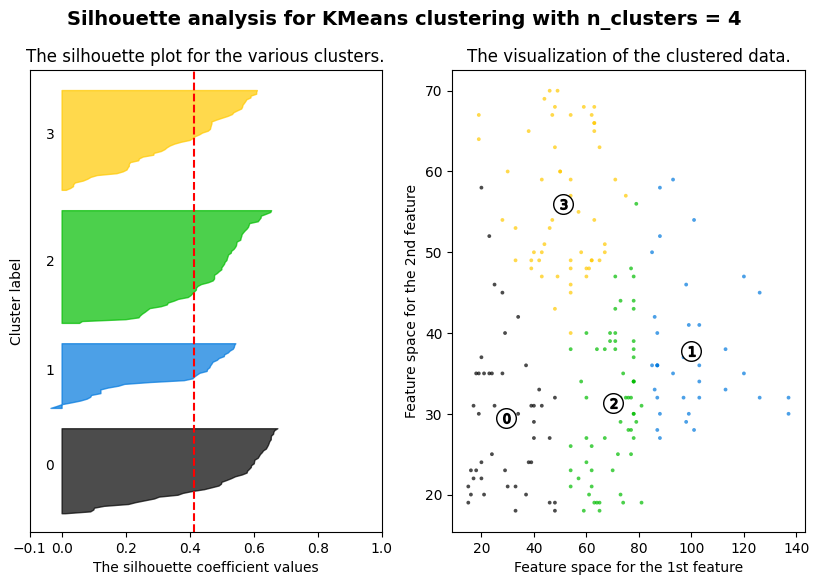

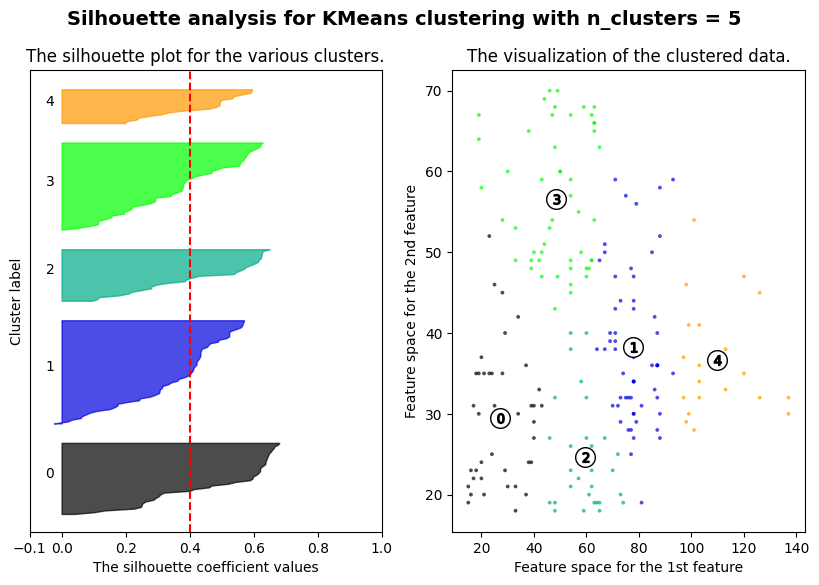

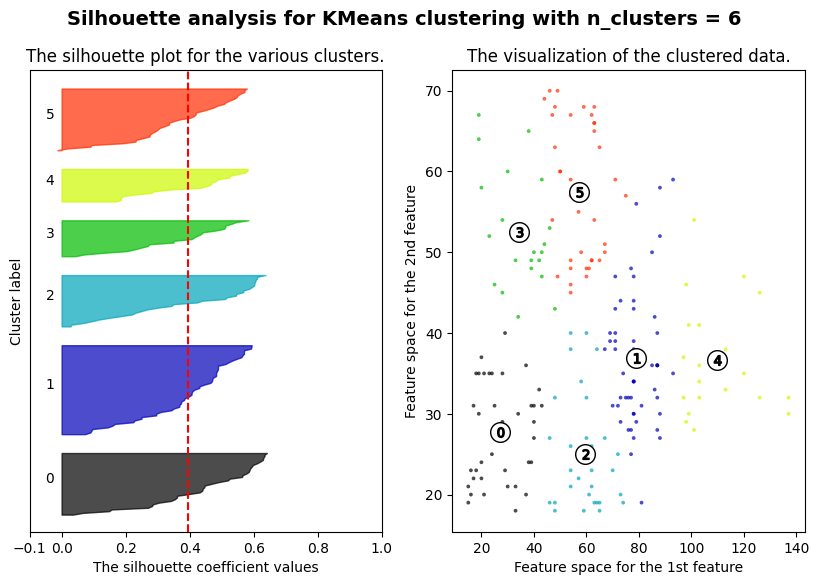

In [ ]:
print_values(income_age,range_n_clusters,w_income_age,s_income_age,'Income - Age')

WCSS and Silhouette Score for 
	Age - Score
------------------------------
------------------------------
K    |	WCSS        |	Sil         
------------------------------
2    |	75949.156   |	0.469       
------------------------------
3    |	45840.677   |	0.453       
------------------------------
4    |	28165.584   |	0.500       
------------------------------
5    |	23838.249   |	0.434       
------------------------------
6    |	19483.118   |	0.438       
------------------------------


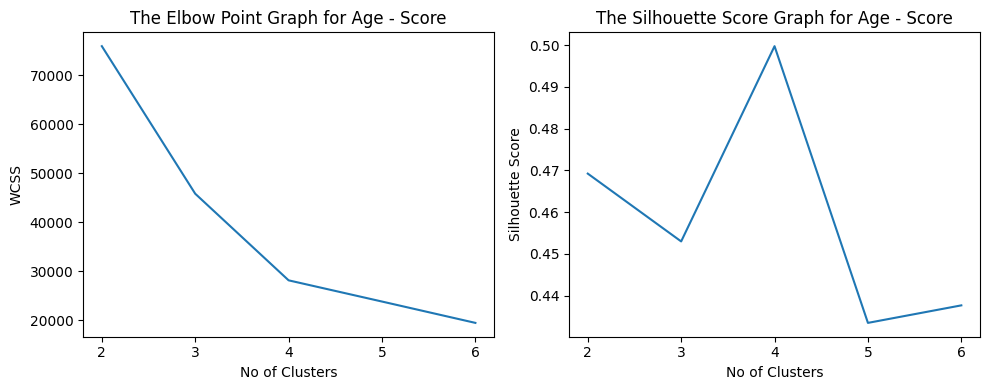

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 The average silhouette_score is : 0.4537025770427172
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 The average silhouette_score is : 0.4449213061096378
For n_clusters = 6 The average silhouette_score is : 0.4148487164675451


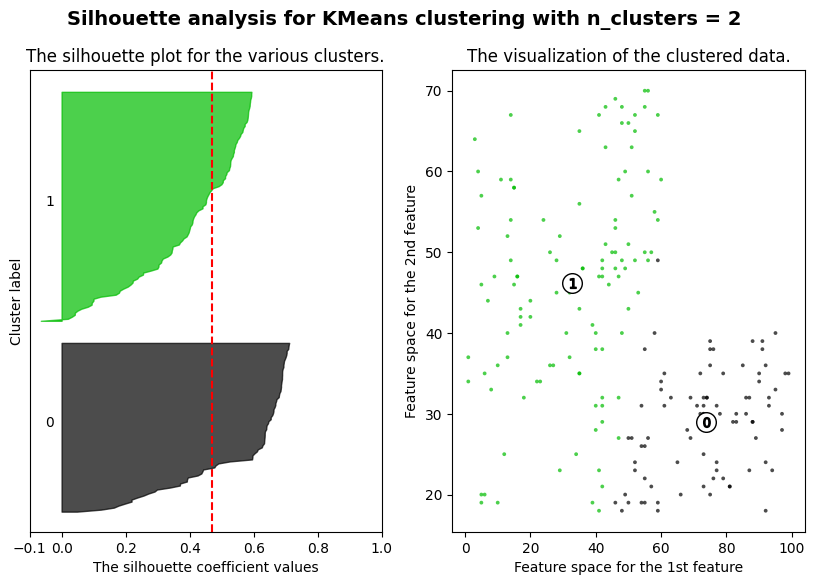

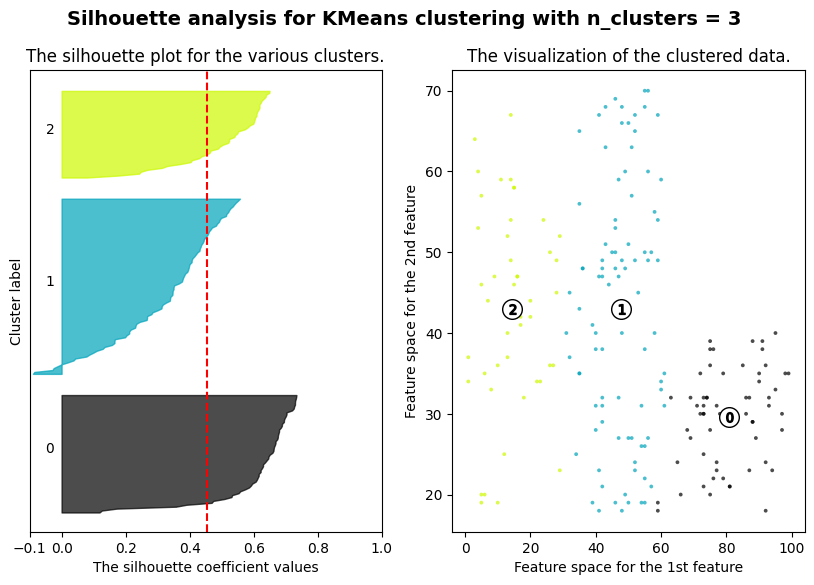

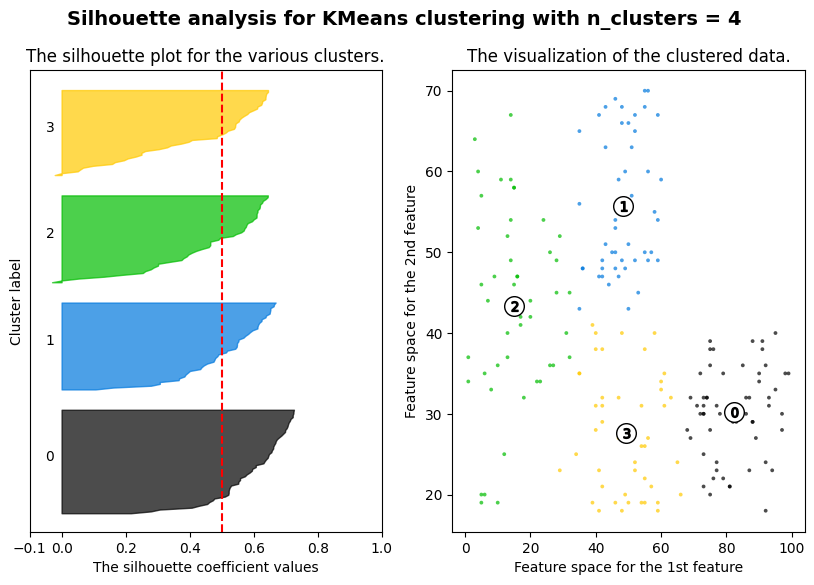

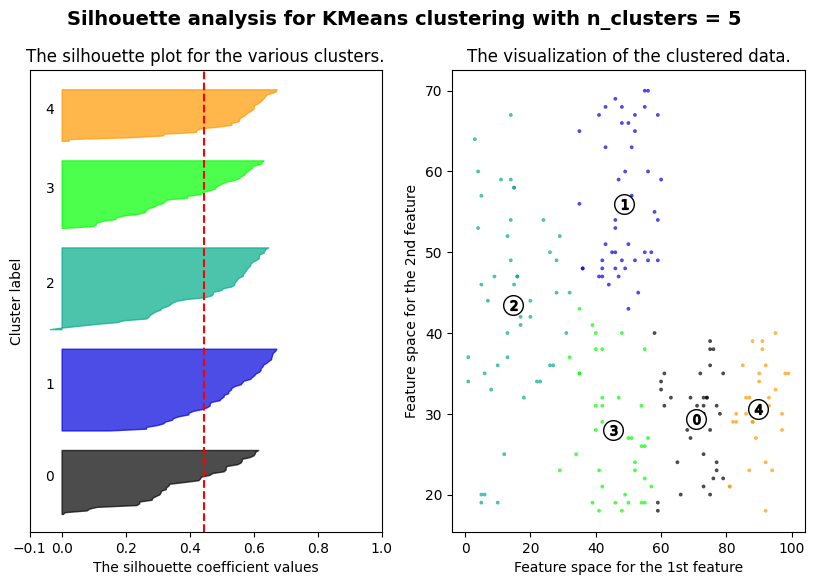

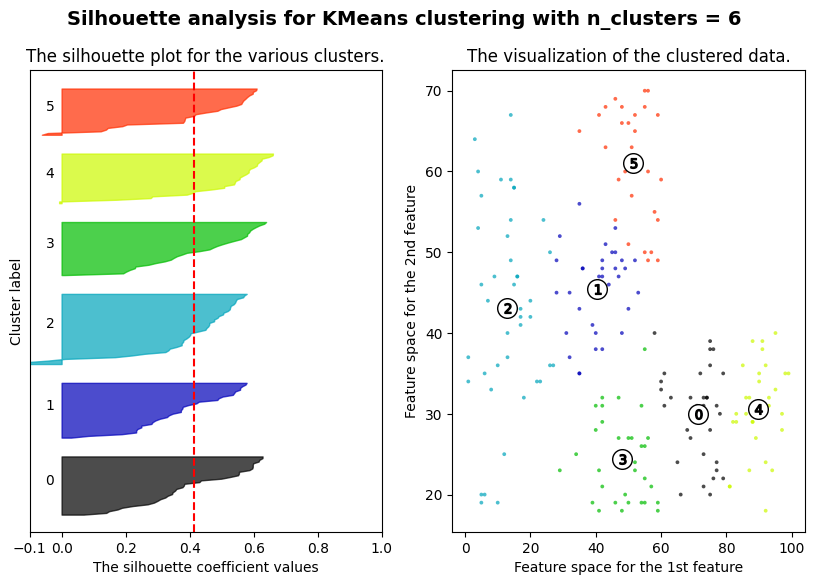

In [ ]:
print_values(age_score,range_n_clusters,w_age_score,s_age_score,'Age - Score')

From the above graphs, we got the optimal number of clusters:

1. Income - Score:

  k = 4

2. Age - Score:

  k = 5

3. Income - Age:

  k = 5



In [ ]:
kmeans_income_score = KMeans(n_clusters = 4,max_iter=1000)
Y_income_score = kmeans_income_score.fit_predict(income_score)
######
kmeans_income_age = KMeans(n_clusters = 5,max_iter=1000)
Y_income_age = kmeans_income_age.fit_predict(income_age)
########
kmeans_age_score = KMeans(n_clusters = 5,max_iter=1000)
Y_age_score = kmeans_age_score.fit_predict(age_score)

In [ ]:
def plot_clusters(X,Y,model,combination,threshold):
  k = model.n_clusters
  h = 0.01  # step size of the meshgrid
  x_min, x_max = X[:, 0].min() - threshold, X[:, 0].max() + threshold
  y_min, y_max = X[:, 1].min() - threshold, X[:, 1].max() + threshold
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predictions for each point in the meshgrid
  mesh_predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
  mesh_predictions = mesh_predictions.reshape(xx.shape)

  # Plot decision boundaries
  plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Paired, alpha=0.3)

  # Plot data points for each cluster
  for i in range(k):
    label='Cluster'+str(i+1)
    plt.scatter(X[Y==i,0], X[Y==i,1], s=50,label=label)

  # Plot centroids
  plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', s=100, c='black', label='Centroid')

  plt.title('Clustering of {} with Decision Boundaries'.format(combination))
  x_ax,y_ax = combination.split("-")
  plt.xlabel(x_ax)
  plt.ylabel(y_ax)
  plt.legend()
  plt.show()

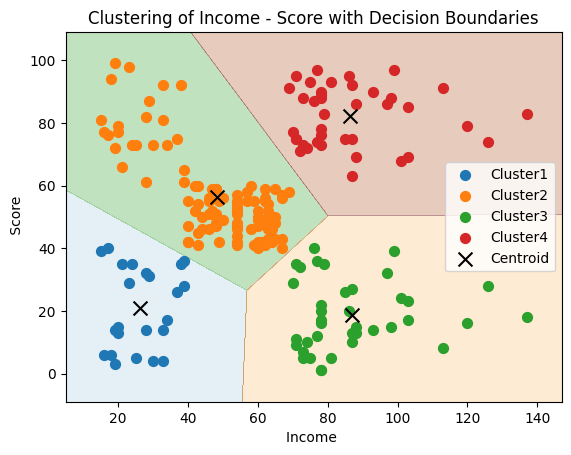

In [ ]:
plot_clusters(income_score,Y_income_score,kmeans_income_score,'Income - Score',10)

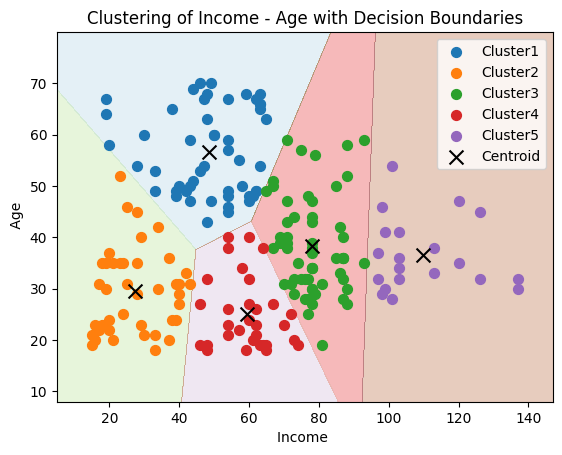

In [ ]:
plot_clusters(income_age,Y_income_age,kmeans_income_age,'Income - Age',10)

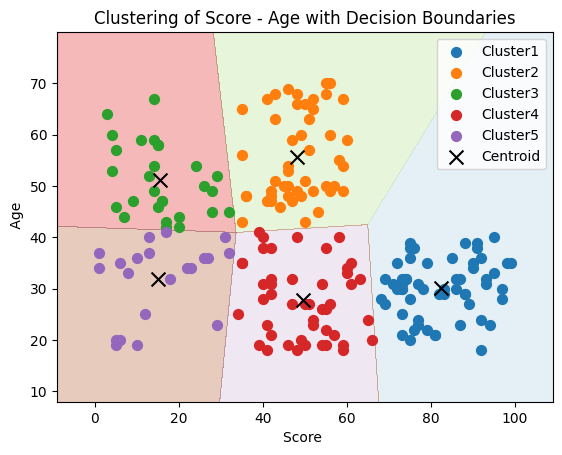

In [ ]:
plot_clusters(age_score,Y_age_score,kmeans_age_score,'Score - Age',10)

Now considering all the three features and finding the number of clusters.

In [ ]:
model_data_sc.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
mall_scaled = pd.DataFrame(scaler.fit_transform(mall[['Annual Income (k$)','Age','Spending Score (1-100)']]),columns = ['Annual Income (k$)','Age','Spending Score (1-100)'])

In [ ]:
mall_scaled.describe()

,Annual Income (k$),Age,Spending Score (1-100)
count,200.000,200.000,200.000
mean,-0.026,0.141,0.005
std,0.720,0.690,0.675
min,-1.274,-0.889,-1.281
25%,-0.548,-0.358,-0.399
50%,0.000,0.000,0.000
75%,0.452,0.642,0.601
max,2.068,1.679,1.281


In [ ]:
pca = PCA(n_components=2)
mall_pca = pca.fit_transform(mall_scaled)

In [ ]:
pca_df = pd.DataFrame(data=mall_pca, columns=['PC1', 'PC2'])

In [ ]:
pca_df.head(1)

,PC1,PC2
0,-0.419,-1.281


In [ ]:
w_pca,s_pca = cal_wcss_sil(pca_df.values,range_n_clusters)

WCSS and Silhouette Score for 
	PC1 - PC2
------------------------------
------------------------------
K    |	WCSS        |	Sil         
------------------------------
2    |	128.509     |	0.413       
------------------------------
3    |	86.441      |	0.412       
------------------------------
4    |	60.461      |	0.424       
------------------------------
5    |	49.247      |	0.385       
------------------------------
6    |	40.446      |	0.371       
------------------------------


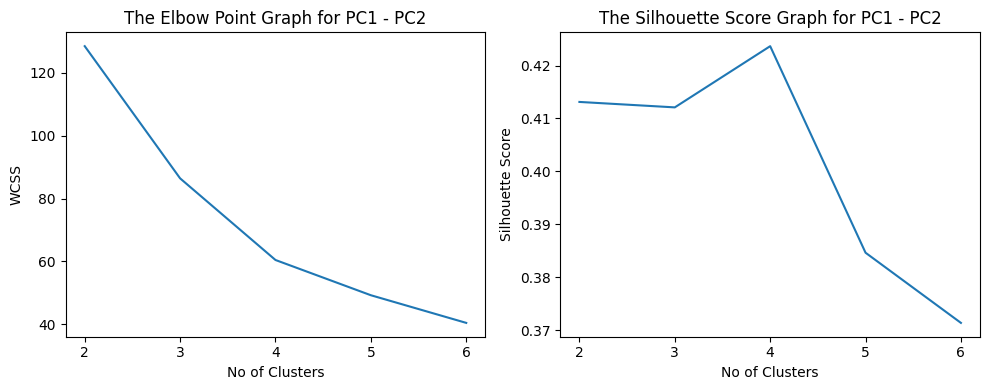

For n_clusters = 2 The average silhouette_score is : 0.28331200066140017
For n_clusters = 3 The average silhouette_score is : 0.41208967278498776
For n_clusters = 4 The average silhouette_score is : 0.4033399859988805
For n_clusters = 5 The average silhouette_score is : 0.3837090487102581
For n_clusters = 6 The average silhouette_score is : 0.3613130662323934


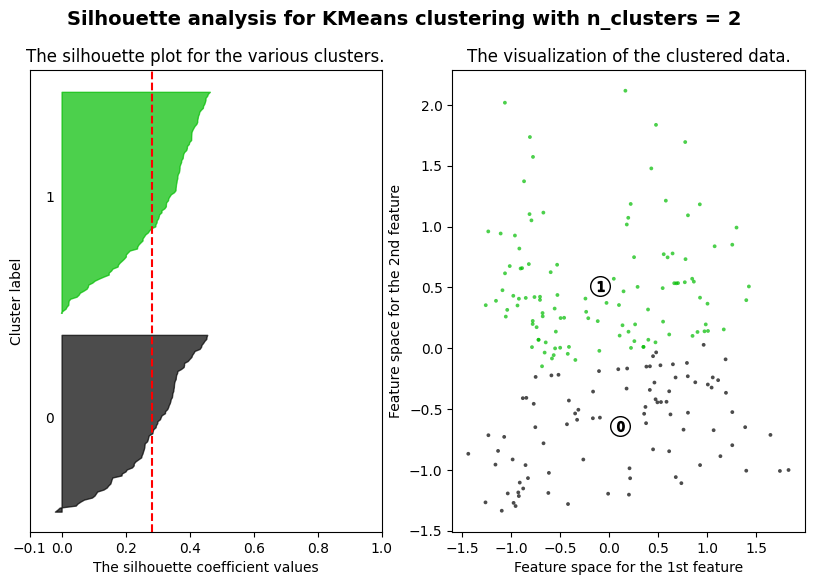

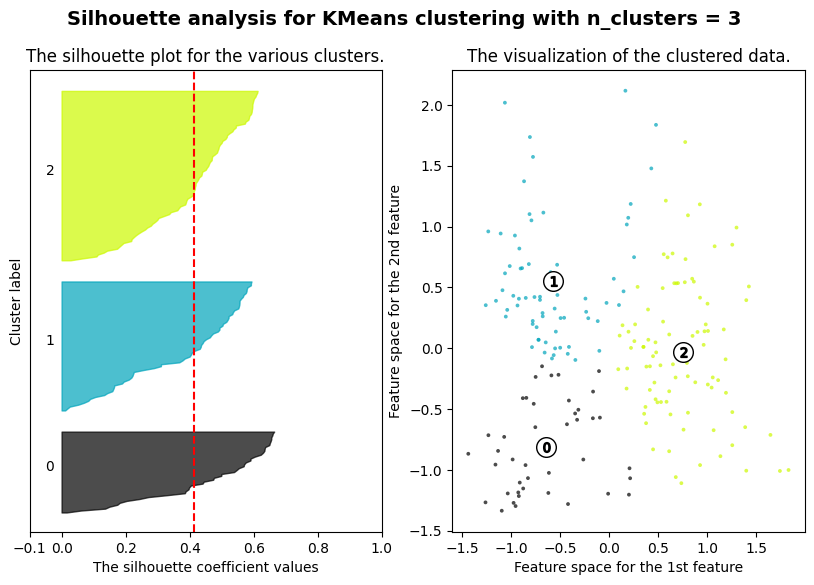

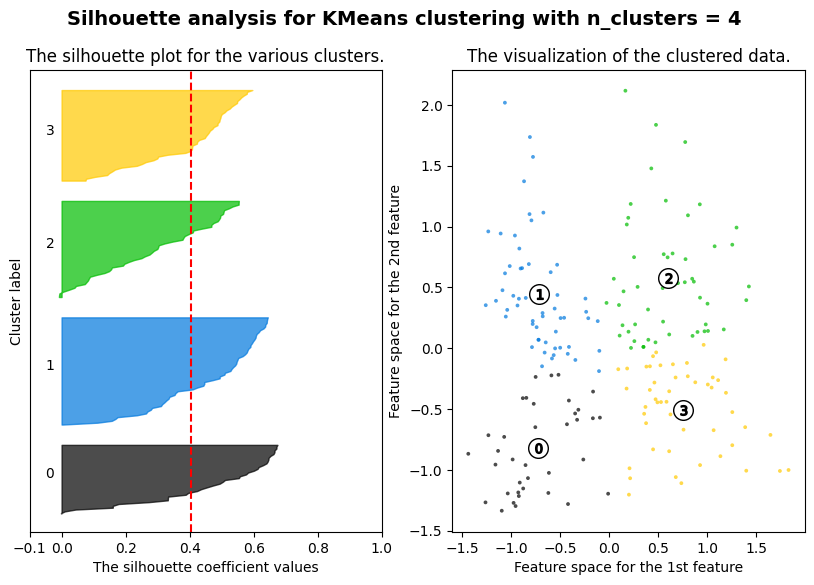

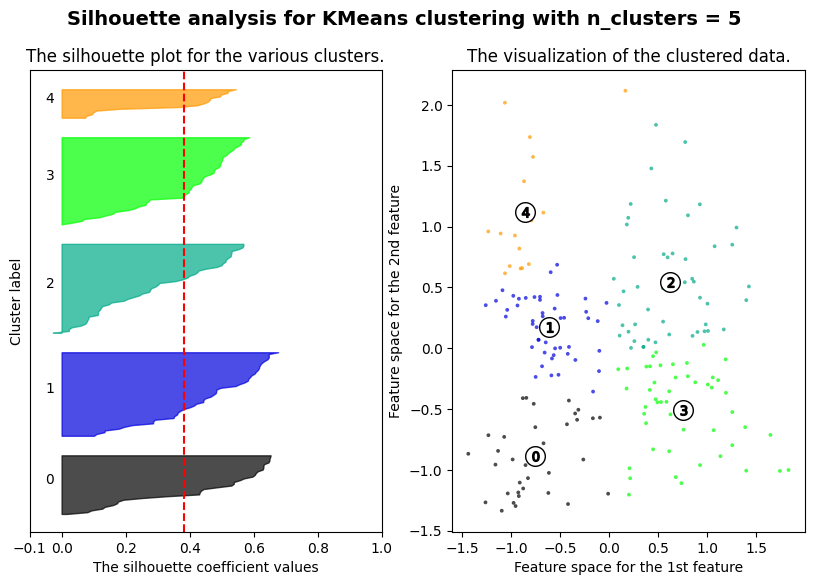

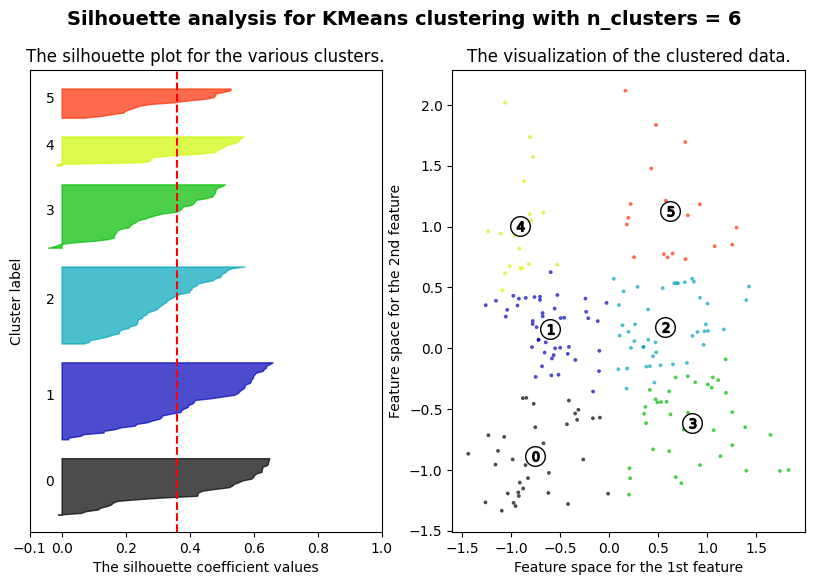

In [ ]:
print_values(pca_df.values,range_n_clusters,w_pca,s_pca,'PC1 - PC2')

In [ ]:
kmeans_pca = KMeans(n_clusters = 3,max_iter=1000)
Y_pca = kmeans_pca.fit_predict(pca_df.values)

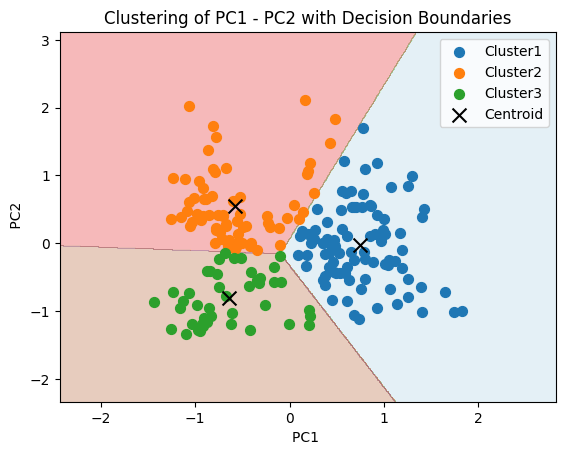

In [ ]:
plot_clusters(pca_df.values,Y_pca,kmeans_pca,'PC1 - PC2',1)